# Causal impact analysis 

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt

In [192]:
import pandas as pd
from causalimpact import CausalImpact
import pickle

from parse_cesar1 import get_timestep_tuples
from pyprocessta.causalimpact import run_causal_impact_analysis
from pyprocessta.preprocess.resample import resample_regular
from definitions import TARGETS, MEASUREMENTS

In [126]:
with open('step_times.pkl', 'rb') as handle:
    times = pickle.load(handle)

In [223]:
df = pd.read_pickle('detrended.pkl')

In [224]:
df.head()

,H2O,Carbon dioxide CO2,Ammonia NH3,2-Amino-2-methylpropanol C4H11NO,Piperazine C4H10N2,Oxygen,PI-2,TI-2,FI-2,PI-3,...,TI-16,FI-151,TI-151,TI-152,TI-212,FI-241,TI-241,TI-242,valve-position-12,TI-1213
2020-01-15 11:42:01,-9.338285,-1.260562,-1.237421,-76.176279,-26.592374,15.619122,0.000198,-0.237440,-1.936132,-0.009789,...,-0.268709,-905.155509,-0.116558,0.284825,-1.593279,19.249358,0.126896,1.460131,-0.027005,-0.359673
2020-01-15 11:44:01,-9.412928,-1.260599,-1.238284,-76.827911,-26.670604,15.579063,0.000529,-0.217689,0.604695,-0.009416,...,-0.243349,-909.054156,-0.122209,0.292335,-1.645369,18.179695,0.102613,1.471488,-0.026998,-0.327701
2020-01-15 11:46:01,-9.467572,-1.270636,-1.239146,-76.864542,-26.838833,15.654005,0.000465,-0.271928,-4.456223,-0.009643,...,-0.226399,-939.372726,-0.123037,0.305385,-1.653758,19.805359,0.052823,1.418737,-0.026991,-0.341903
2020-01-15 11:48:01,-9.467216,-1.270673,-1.240009,-76.506174,-26.717062,15.658946,0.000441,-0.251111,-2.567251,-0.009400,...,-0.177569,-930.139537,-0.133873,0.365939,-1.633634,17.203484,0.037802,1.405860,-0.026984,-0.358361
2020-01-15 11:50:01,-9.466860,-1.265709,-1.240872,-76.567805,-26.700292,15.598888,0.000285,-0.216942,-0.527949,-0.009396,...,-0.170799,-919.436622,-0.147239,0.360144,-1.686569,16.144501,0.078390,1.404781,-0.026977,-0.398216


In [235]:
df = resample_regular(df, interval='5min')

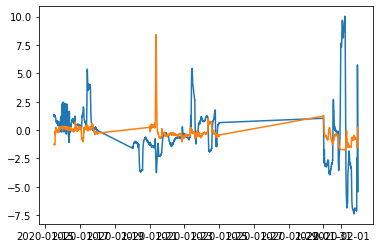

In [226]:
plt.plot(df[MEASUREMENTS[4]])
plt.plot(df[TARGETS[0]])

The experiments with the faster response on emissions are:

- Day 1: water wash temperature step increase. 6~min time delay in amine and CO2 emissions.
- Day 5: lean solvent and flue gas flow step decrease. 6~min time delay in amine emissions.
- Day 7: lean solvent and water wash temperature step decrease. 6 min time delay in PZ emissions and 12~min delay in the response of AMP emissions.
- Day 8: capture rate step decrease. And consequently reboiler level step decrease.
- Day 9: dry bed operation


If the time delay and the magnitude of emissions are both taken into consideration, then the experiments with the highest effect on emissions (ranking the one with the highest effect starting from the top to the bottom) become:

- Day 9: dry bed operation
- Day 7: lean solvent and water wash temperature step decrease
- Day 1: water wash temperature step increase



In [227]:
TARGETS

['Carbon dioxide CO2',
 '2-Amino-2-methylpropanol C4H11NO',
 'Piperazine C4H10N2',
 'Ammonia NH3']

## Day 1: Step change in water wash temperature (TI-19)

In [236]:
a, b = get_timestep_tuples(df, times, 6)

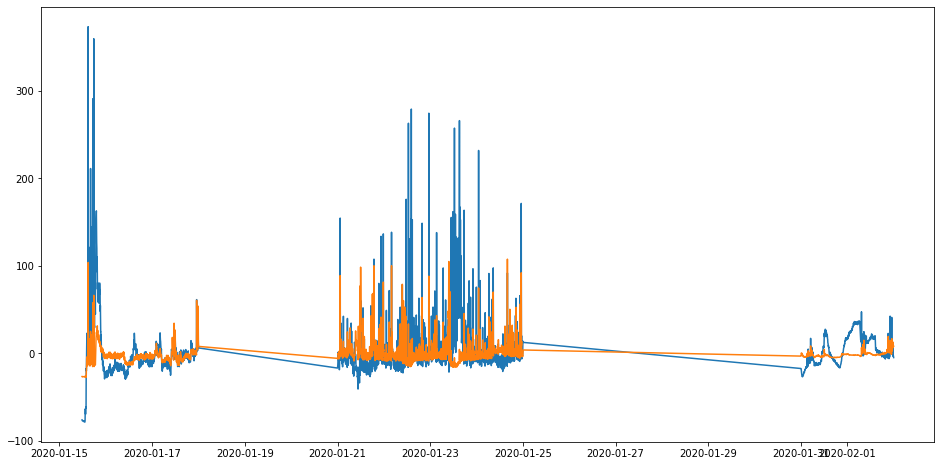

In [196]:
plt.figure(figsize=(16,8))
plt.plot(df[TARGETS[1]])
plt.plot(df[TARGETS[2]])

### 2-Amino-2-methylpropanol

In [243]:
ci = run_causal_impact_analysis(df, MEASUREMENTS, 'FI-19',  TARGETS[2],  a, b)

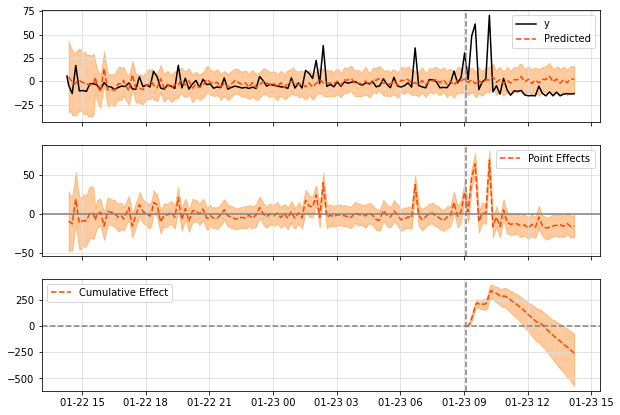

In [244]:
ci.plot()

In [242]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. -3.49. By contrast, in the absence of an
intervention, we would have expected an average response of -0.03.
The 95% interval of this counterfactual prediction is [-2.61, 3.23].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -3.46 with a 95% interval of
[-6.72, -0.87]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of -212.62.
By contrast, had the intervention not taken place, we would have expected
a sum of -1.71. The 95% interval of this prediction is [-159.5, 197.07].


The above results are given in terms of absolute numbers. In relative
terms, the response variabl

### Piperazine C4H10N2

In [129]:
ci = run_causal_impact_analysis(df, MEASUREMENTS, 'TI-19', 'Piperazine C4H10N2',  a, b)

/Users/kevinmaikjablonka/opt/miniconda3/envs/pyprocessta/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/sample.py:341: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


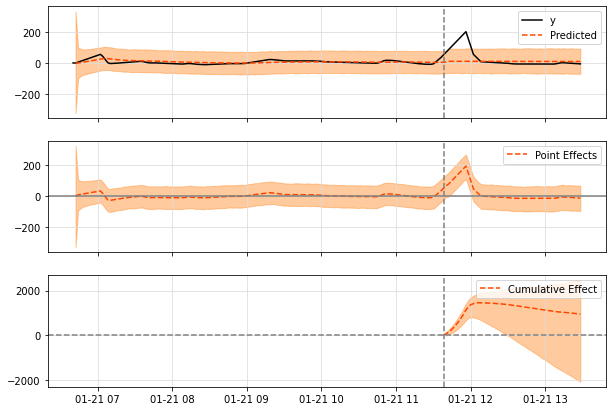

In [130]:
ci.plot()

In [122]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 27.15. In the absence of an
intervention, we would have expected an average response of 20.56.
The 95% interval of this counterfactual prediction is [-29.16, 130.35].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 6.59 with a 95% interval of
[-103.2, 56.31]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1493.27.
Had the intervention not taken place, we would have expected
a sum of 1130.62. The 95% interval of this prediction is [-1604.01, 7169.46].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increa

### CO2

In [50]:
ci = run_causal_impact_analysis(df, MEASUREMENTS, 'TI-19', 'Ammonia NH3',  a, b)

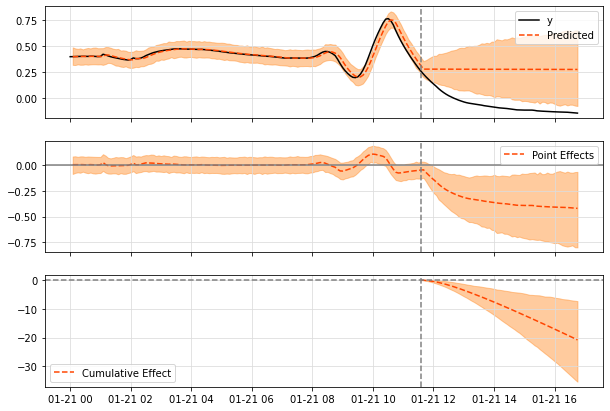

In [51]:
ci.plot()